In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

In [7]:
from time import perf_counter
from functools import wraps

def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = perf_counter()
        result = func(*args, **kwargs)
        print(f'{func.__name__} took {perf_counter() - start_time:.2f} seconds')
        return result
    return wrapper

In [8]:
class KNN:

    def __init__(self, k: int = 3):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X, dtype=float)
        self.y_train = np.array(y)

    @timeit
    def predict(self, X):
        X = np.array(X, dtype=float)
        predictions = [self._predict(x) for x in X]
        return predictions
        
    def _predict(self, x):
        
        if not hasattr(self, 'X_train'):
            raise ValueError('model must be fitted before make predictions.')
        
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        return Counter(k_nearest_labels).most_common()[0][0]
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

knn = KNN()
knn.fit(X, y)

y_pred = knn.predict(X)

predict took 0.17 seconds


Accuracy: 0.96


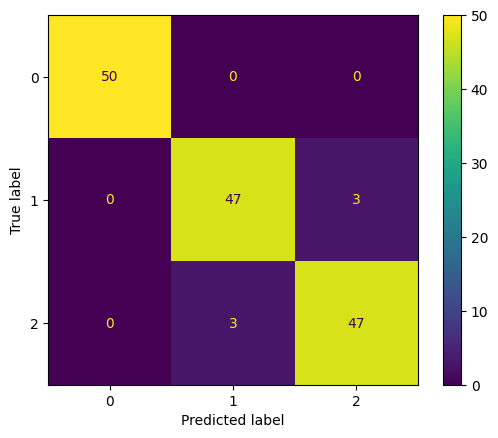

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



In [9]:
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = ConfusionMatrixDisplay(confusion_matrix(y, y_pred))
cm.plot()
plt.show()

report = classification_report(y, y_pred)
print("Classification Report:")
print(report)

predict took 0.17 seconds
Accuracy: 0.96


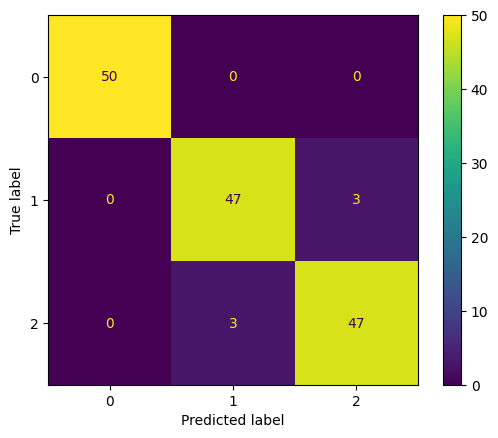

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150



In [10]:
sklearn_knn = KNeighborsClassifier()
sklearn_knn.fit(X, y)

y_pred = knn.predict(X)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = ConfusionMatrixDisplay(confusion_matrix(y, y_pred))
cm.plot()
plt.show()

report = classification_report(y, y_pred)
print("Classification Report:")
print(report)